In [1]:
'''
    sklearn.datasets import make_blobs 이용해서 데이터셋 자동 생성


'''

'\n    sklearn.datasets import make_blobs 이용해서 데이터셋 자동 생성\n\n\n'

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

### 1. 데이터수집

In [3]:
X,y = make_blobs(n_samples=50,n_features=2, centers=2, cluster_std=0.5,random_state=4)
X,y #centers 는 종류 class

(array([[ 9.24222414,  1.36290933],
        [ 9.17124955,  3.52485535],
        [ 8.84264231,  1.29144424],
        [ 9.13144602,  0.15235637],
        [ 8.66686663,  0.93996493],
        [ 8.76869749,  1.19960487],
        [10.45227689,  1.14179259],
        [ 9.4874227 ,  3.93018752],
        [ 9.55834394,  4.10909742],
        [10.03578098,  4.41764995],
        [ 9.70226758,  0.96771277],
        [ 9.53292197,  5.29136138],
        [ 8.90512626,  4.03222184],
        [ 8.91604215,  5.30752241],
        [ 9.42054325,  0.3401709 ],
        [ 9.55313298,  1.11077156],
        [ 9.01498386,  1.21587064],
        [ 8.84910095,  0.97186135],
        [ 9.73389792,  0.02420705],
        [ 9.1891148 ,  1.54564628],
        [ 9.27524446,  1.34568829],
        [ 9.85130417,  4.30586485],
        [ 9.0167434 ,  1.24393257],
        [ 9.70857663,  4.44654264],
        [10.69197928,  4.47249157],
        [ 9.4779887 ,  4.39064298],
        [ 9.2024951 ,  1.34290093],
        [10.14364725,  4.269

### 시각화

In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
%matplotlib inline

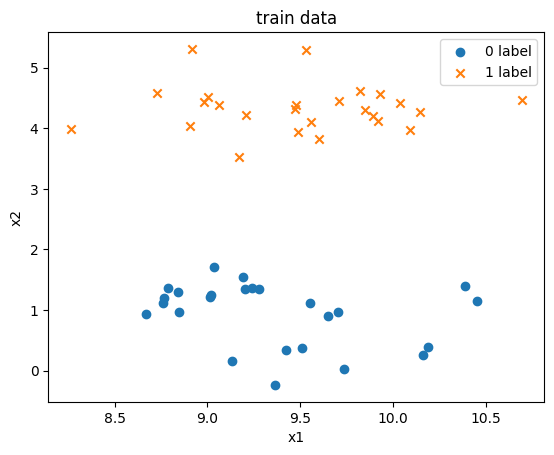

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="0 label")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label="1 label")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("train data")
plt.show()

### 2. 모델 생성 및 훈련

In [6]:
from sklearn.svm import SVC

In [7]:
model1 = SVC(kernel='linear',C=1.0,probability=) #C=1.0 비용함수 얼마나 많은 샘플이 다른 클래스에 위치 하는 것을 허용할지 결정 (불순도와 비슷)
model1.fit(X,y) #C값이 작을 수록 규제강도가 강해진다

SVC(kernel='linear', probability=True)

In [8]:
new_data = [[10,2],[8.7,2.8]]
pred=model1.predict(new_data)
pred

array([0, 1])

In [9]:
model1.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [10]:
# 서포트 벡터 인덱스
model1.support_

array([42,  1])

In [11]:
X[42],X[1]

(array([9.03715314, 1.71813465]), array([9.17124955, 3.52485535]))

In [12]:
# 서포트 벡터 개수 (class 별)
model1.n_support_

array([1, 1])

In [13]:
model1.classes_

array([0, 1])

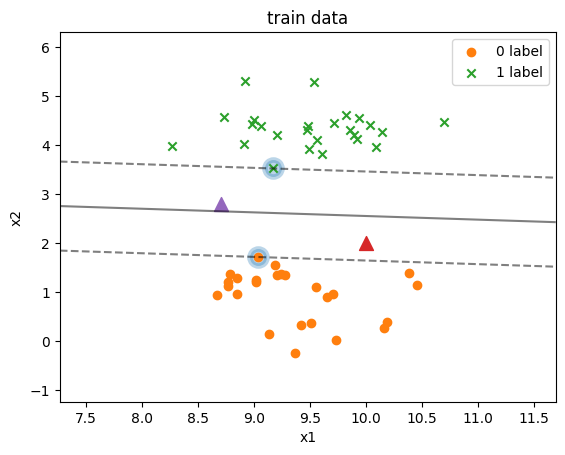

In [14]:
plt.scatter(model1.support_vectors_[:,0], 
            model1.support_vectors_[:,1] , 
            s=150, alpha=0.3,
            linewidth=4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="0 label")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label="1 label")
plt.scatter(10,2,marker='^',s=100)
plt.scatter(8.7,2.8,marker='^',s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("train data")


# 결정 경계 그리기
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model1,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

plt.show()

In [15]:
# kernel = 'linear'이기 때문에 가중치 조회가능
model1.coef_,model1.intercept_

(array([[0.08171082, 1.10091404]]), array([-3.62995208]))

In [16]:
# y = w1*x1 + w2+x2 + w0
# y = 0.08171082 * x1 + 1.10091404 * x2 -3.62995208

In [17]:
## [10,2]에 대해서 직접 y 구하기
y = 0.08171082 * 10 + 1.10091404 * 2 -3.62995208
y

-0.6110157999999997

In [18]:
# y값을 함수로 구하기
model1.decision_function([[10,2]])

array([-0.61101582])

In [22]:
# 확률값 구하기 ==> probabilty = True
model1.predict_proba([[10,2],[8.7,2.8]])

array([[0.75957204, 0.24042796],
       [0.42255635, 0.57744365]])